# Practical Class 4 - Exercises on DAC/ADC modelling and DNL/INL error modelling

In [205]:
import numpy as np
from numpy.random import uniform, normal # import uniform and normal probability distributions to represent noise
import matplotlib.pyplot as plt
import seaborn as sns

from utils import bin2dec, dec2bin, ideal_dac, ideal_adc, nonideal_adc

In [206]:
# define the number of simulation points
Np = 1000
# define the frequency of the sampling clock
Fclk = 100e3 # Hz
# define the time base
dt = 1/Fclk
tD = np.arange(0, Np*dt, dt)

## Problem 9

In [207]:
# define the input signal
A1 = 100e-3
f1 = 1e3
ph1 = 0
s1 = A1*np.sin(2*np.pi*f1*tD + ph1)

# define the ideal ADC parameters
vref = 5 # V
nbit = 12
vlsb = vref/(2**nbit)

# define the quantization noise
p_nq = (vlsb**2)/ 12 # variance of the uniform quantization noise == power of the quantization noise
v_nq = np.sqrt(p_nq) # standard deviation of the uniform quantization noise

# define the power of the signal 
pin = (A1**2)/2 # power of the input sine wave

# compute the snr for A1 = 100 mV
snr = 10*np.log10(pin/p_nq)
print("SNR for $A_{in} = 100 mV$ : " + "{:.2f} dB".format(snr))

SNR for $A_{in} = 100 mV$ : 46.05 dB


In [208]:
# compute the maximum snr (A1  = Vref/2 V = 2.5 V)
A2 = vref/2
snr_max = 10*np.log10((A2**2 / 2)/p_nq)
snr_max_compare = 6.02*nbit + 1.76
print("Maximum SNR for $A_{in} = V_{ref}/2$ : " + "{:.2f} dB".format(snr_max))
print("Maximum SNR obtained using ideal SNR expression : " + "{:.2f} dB".format(snr_max_compare))
assert np.isclose(snr_max, snr_max_compare, 1e-2), "The maximum SNR is not correct"

Maximum SNR for $A_{in} = V_{ref}/2$ : 74.01 dB
Maximum SNR obtained using ideal SNR expression : 74.00 dB


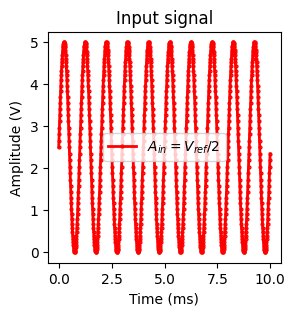

In [209]:
# create the input signal with maximum amplitude
%matplotlib inline
s2 = A2*np.sin(2*np.pi*f1*tD + ph1) + vref/2
# observe the input signal
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
scale_time = 1e-3
ax.plot(tD/scale_time, s2, label="$A_{in} = V_{ref}/2$", color="r", linewidth=2, marker="o", markersize=2, mfc="None")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude (V)")
ax.set_title("Input signal")
ax.legend()
plt.show()

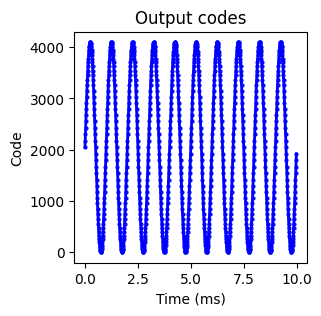

In [210]:
# compute the output codes of the ideal ADC
dout = np.round(s2/vlsb).astype(int)
# plot the output codes
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(tD/scale_time, dout, color="b", linewidth=2, marker="o", markersize=2, mfc="None")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Code")
ax.set_title("Output codes")
plt.show()

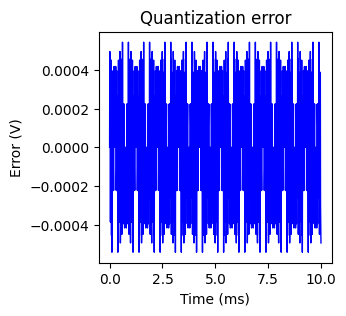

In [211]:
# compute the quantization error
error = dout*vlsb - s2
# plot the quantization error
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(tD/scale_time, error, color="b", linewidth=1, marker="None", markersize=2, mfc="None")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Error (V)")
ax.set_title("Quantization error")
plt.show()

In [212]:
# compute the standard deviation of the quantization error and compare it with the theoretical value
std_dev_error = np.std(error)
print("Standard deviation of the quantization error : " + "{:.2f} mV".format(std_dev_error*1e3))
print("Standard deviation of the quantization error (theoretical) : " + "{:.2f} mV".format(v_nq*1e3))
assert np.isclose(std_dev_error, v_nq, 1e-0), "The standard deviation of the quantization error is not correct"

Standard deviation of the quantization error : 0.29 mV
Standard deviation of the quantization error (theoretical) : 0.35 mV


## Problem 10

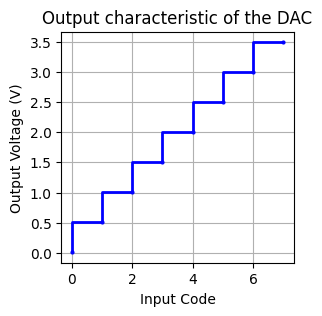

In [213]:
# consider a dac with 3 bits resolution
vref = 4 # V
nbit = 3 # bits
vlsb = vref/(2**nbit)
din = np.arange(0, 2**nbit, 1).astype(int)

# consider the output characterisitic of the DAC
vout_nonideal = np.array([0.011, 0.507, 1.002, 1.501, 1.996, 2.495, 2.996, 3.491])
vout_ideal = din*vlsb
# plot the output characteristic of the DAC
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.step(din, vout_nonideal, color="b", linewidth=2, marker="o", markersize=2, mfc="None")
ax.set_xlabel("Input Code")
ax.set_ylabel("Output Voltage (V)")
ax.set_title("Output characteristic of the DAC")
ax.grid()
plt.show()

In [214]:
# compute the offset and gain error of the DAC
offset = (vout_nonideal[0] + vout_ideal[0])/vlsb # lsb
print("Computed offset error : " + "{:.2f} LSB".format(offset))

# compute the end of scale error of the DAC
end_of_scale = (vout_nonideal[-1] - vout_ideal[-1])/vlsb # lsb
print("Computed end of scale error : " + "{:.2f} LSB".format(end_of_scale))

print("""
Note that the expressions of the DNL and INL aleady 
automatically removes the offset and gain error of the dac, 
through the computation of the real, measured vlsb.
""")

Computed offset error : 0.02 LSB
Computed end of scale error : -0.02 LSB

Note that the expressions of the DNL and INL aleady 
automatically removes the offset and gain error of the dac, 
through the computation of the real, measured vlsb.



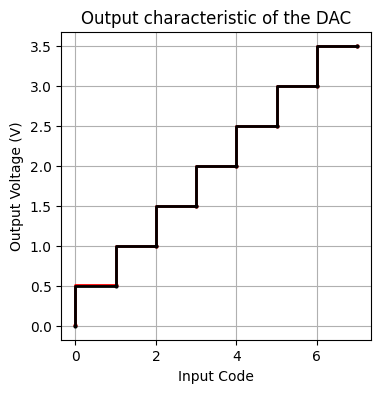

In [215]:
# plot the output characteristic of the DAC against the previous one and the ideal one
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.step(din, vout_nonideal, color="r", linewidth=2, marker="o", markersize=2, mfc="None", label="Non-ideal")
ax.step(din, vout_ideal, color="k", linewidth=2, marker="o", markersize=2, mfc="None", label="Ideal")
ax.set_xlabel("Input Code")
ax.set_ylabel("Output Voltage (V)")
ax.set_title("Output characteristic of the DAC")
ax.grid(True)
plt.show()

Measured LSB : 497.14 mV
Theoretical LSB : 500.00 mV


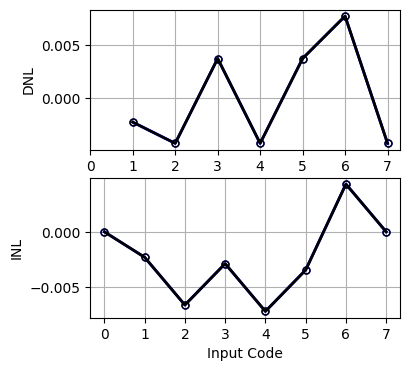

In [216]:
# compute the non-linear errors of the DAC 
# compute the measured LSB voltage
vlsb_measured = (vout_nonideal[-1] - vout_nonideal[0])/((2**nbit) - 1)
print("Measured LSB : " + "{:.2f} mV".format(vlsb_measured*1e3))
print("Theoretical LSB : " + "{:.2f} mV".format(vlsb*1e3))

# compute the DNL 
dnl = np.diff(vout_nonideal)/vlsb_measured - 1
dnl_classic = (vout_nonideal[1:] - vout_nonideal[:-1])/vlsb_measured - 1
assert np.allclose(dnl, dnl_classic), "The DNL is not correct"
# compute the INL
inl = (vout_nonideal - vlsb_measured*din - vout_nonideal[0])/vlsb_measured
# compute the inl using the cumsum
inl_cumsum = np.array([0] + np.cumsum(dnl).tolist())
dnl_diff = np.diff(inl)
# plot the DNL and INL
fig, ax = plt.subplots(2, 1, figsize=(4, 4))
ax[0].plot(din[1:], dnl, color="b", linewidth=2, marker="o", markersize=5, mfc="None")
ax[0].plot(din[1:], dnl_diff, color="k", linewidth=2, marker="o", markersize=5, mfc="None")
ax[0].set_ylabel("DNL")
ax[0].set_xticks(din)
ax[1].plot(din, inl, color="b", linewidth=2, marker="o", markersize=5, mfc="None")
ax[1].plot(din, inl_cumsum, color="k", linewidth=2, marker="o", markersize=5, mfc="None")
ax[1].set_xlabel("Input Code")
ax[1].set_xticks(din)
ax[1].set_ylabel("INL")
ax[0].grid(True)
ax[1].grid(True)
plt.show()

<p align="justify">
<b>Note :</b> that first and last point of the INL is 0.0 LSB, and this must always be true
once the expression we use to compute the INL automatically removes the offset and gain error of the DAC
(by subtracting vlsb_measured * din[0] and dividing by vlsb_measured, respectively).
</p>

In [217]:
# compute the effective number of bits of the DAC using the INL (once the lost bits can be compute by the 
# difference between the minimum and maximum value of the INL)
dac_linearity = nbit - np.log2(np.max(inl) - np.min(inl))
print("Effective number of bits (ENOB) : " + "{:.2f}".format(dac_linearity))


print("""
The linearity of the DAC doesn't measure the resolution of the DAC, 
it actually measures how aligned each code transition is with the code transitions
of an ideal DAC with 9,44 bits of resolution. If the max(INL) - min(INL) covnerges towards 0 LSB,
linearity of the DAC converges towards infinity, being able to preserve a resolution of infinite number of bits 
when performing digital-to-analog conversion.
""")

Effective number of bits (ENOB) : 9.44

The linearity of the DAC doesn't measure the resolution of the DAC, 
it actually measures how aligned each code transition is with the code transitions
of an ideal DAC with 9,44 bits of resolution. If the max(INL) - min(INL) covnerges towards 0 LSB,
linearity of the DAC converges towards infinity, being able to preserve a resolution of infinite number of bits 
when performing digital-to-analog conversion.



## Problem 12

vn level =  1.953125 mV


Text(0.5, 1.0, 'Input signal and output code')

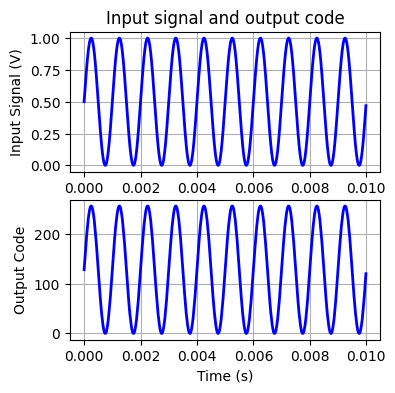

In [218]:
# define the adc
nbit = 8
vref = 1 
vlsb = vref/(2**nbit)
# define the input signal
A3 = vref/2 # V
f3 = 1e3 # Hz
# setup the input signal frequency to behold 
# coherent sampling
f3 = np.round(f3/Fclk* Np)*Fclk/Np # Hz
ph1 = 0 # rad
vn = vlsb/2 # V
mV = 1e-3 # V
dc_level = vref/2
print("vn level = ", vn/mV, "mV")
s3 = A3*np.sin(2*np.pi*f3*tD + ph1) + dc_level + normal(0, vn**2, Np)# V
# compute the quantization error
p_nq = vlsb**2 / 12 # V**2
vnq = np.sqrt(p_nq) # V
# define the input signal with quantization error
vnq_t = uniform(-vnq, vnq, len(tD)) # V
# define the dout 
dout = np.round(s3 / vlsb).astype(int)

# observe dout and s3
fig, ax = plt.subplots(2, 1, figsize=(4, 4))
ax[0].plot(tD, s3, color="b", linewidth=2)
ax[0].set_ylabel("Input Signal (V)")    
ax[1].plot(tD, dout, color="b", linewidth=2)
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Output Code")
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_title("Input signal and output code")

Dt = 10000.0 ns
Np = 1000 samples


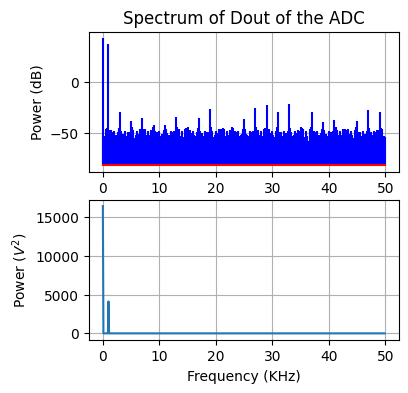

In [225]:
print(f"Dt = {dt/1e-9} ns")
print(f"Np = {Np} samples")

f_scale = 1e3
p_scale = 1
fD = np.fft.fftshift(np.fft.fftfreq(Np, dt))
# compute the fft of the dout signal 
dout_f = np.abs(np.fft.fftshift(np.fft.fft(dout) / Np))
dout_p = (dout_f*dout_f)
dout_db = 10*np.log10(dout_p, out=np.zeros_like(dout_p), where=(dout_p!=0))

fig, ax = plt.subplots(2, 1, figsize=(4, 4))
ax[0].stem(
    fD[fD>=0]/f_scale, dout_db[fD>=0] / p_scale, label="Input signal",
    bottom=np.min(dout_db / p_scale),
    #use_line_collection=True,
    linefmt="b-",
    markerfmt="none",
    basefmt="r-",)
ax[0].set_xlabel("Frequency (KHz)")
ax[0].set_ylabel("Power (dB)")
ax[0].set_title("Spectrum of Dout of the ADC")
ax[0].grid(True)
ax[1].plot(fD[fD>=0]/ffactor, dout_p[fD>=0], label="Input signal")
ax[1].set_xlabel("Frequency (KHz)")
ax[1].set_ylabel("Power ($V^2$)")
ax[1].grid(True)
plt.show()

Power of the input signal :  4106.341497026302 V**2
Power of the quantization noise :  20.491426502873903 V**2
SNR of the ADC :  23.018828712120772 dB


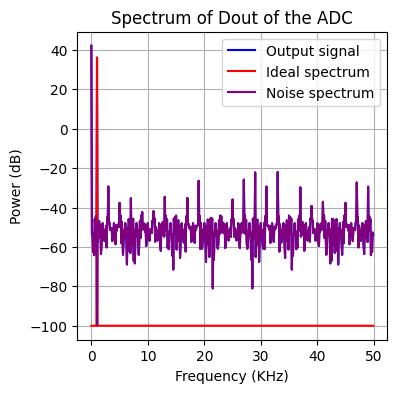

In [226]:
# compute the snr of the ADC using the spectrum of dout
fbin = fD[np.argmin(np.abs(fD-f3))] # get the bin of the signal
assert np.all(fbin == np.nan) == False, "The signal is not present in the spectrum of the output signal"
dout_p_fin = dout_p[fD == fbin][0] # get the power of the signal

new_zero = 1e-10

print ("Power of the input signal : ", dout_p_fin, "V**2")
ideal_spectrum = new_zero*np.ones(len(dout_p)) # create an ideal spectrum
ideal_spectrum[fD == fbin] = dout_p_fin # set the power of the signal to the power of the input signal	
noise_spectrum = dout_p - ideal_spectrum # compute the noise spectrum
noise_spectrum[noise_spectrum == 0] = new_zero # set the negative values to 0
q_noise_p = np.mean(noise_spectrum) # get the power of the quantization noise
# observe the spectrum and the ideal spectrum
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(fD[fD>=0]/f_scale, 10*np.log10(dout_p[fD>=0]), label="Output signal", color="b")
ax.plot(fD[fD>=0]/f_scale, 10*np.log10(ideal_spectrum[fD>=0]), label="Ideal spectrum", color="r")
ax.plot(fD[fD>=0]/f_scale, 10*np.log10(noise_spectrum[fD>=0]), label="Noise spectrum", color="purple")
ax.set_xlabel("Frequency (KHz)")
ax.set_ylabel("Power (dB)")
ax.set_title("Spectrum of Dout of the ADC")
ax.grid(True)
ax.legend()

print("Power of the quantization noise : ", q_noise_p, "V**2")
snr = 10*np.log10(dout_p_fin / q_noise_p) # compute the snr
print("SNR of the ADC : ", snr, "dB")

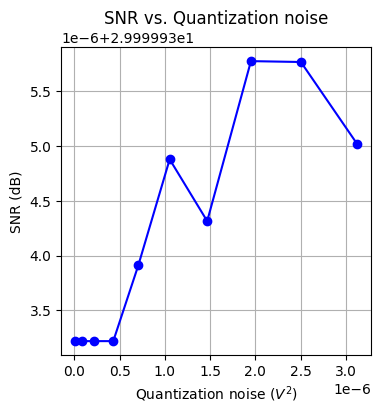

In [227]:
# plot the snr of the adc against the noise of the input signal
vni = 0.1e-3
noise_step = (vlsb/2 - vni)/10
noise = np.arange(vni, vlsb/2, noise_step)
qnoise = []
snrs = []
for vn in noise:
    s3 = A3*np.sin(2*np.pi*f3*tD + ph1) + dc_level + normal(0, vn**2, Np)# V
    dout = np.round(s3 / vlsb).astype(int)
    # compute the fft of the dout signal
    dout_f = np.abs(np.fft.fftshift(np.fft.fft(dout) / Np))
    dout_p = (dout_f*dout_f)
    dout_p[fD == 0] = new_zero # set the power of the DC component to 0
    fbin = fD[np.argmin(np.abs(fD-f3))] # get the bin of the signal
    dout_p_fin = dout_p[fD == fbin] # get the power of the input signal
    ideal_spectrum = new_zero*np.ones(len(dout_p)) # create an ideal spectrum
    ideal_spectrum[fD == fbin] = dout_p_fin # set the power of the signal to the power of the input signal	
    noise_spectrum = dout_p - ideal_spectrum # compute the noise spectrum
    noise_spectrum[noise_spectrum == 0] = new_zero # set the negative values to 0
    q_noise_p = np.mean(noise_spectrum) # get the power of the quantization noise
    snr = 10*np.log10(dout_p_fin / q_noise_p) # compute the snr
    qnoise.append(vn**2)
    snrs.append(snr)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(np.array(qnoise), np.array(snrs), marker="o", color="b")
ax.set_xlabel("Quantization noise ($V^2$)")
ax.set_ylabel("SNR (dB)")
ax.set_title("SNR vs. Quantization noise")
ax.grid(True)
plt.show()
